In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [3]:
# Read in data into a dataframe 
data = pd.read_csv('3_class_bace.csv',sep=";")
# Display top of dataframe
data.head()

,SMILES,bace_class
0,C[C@H](CC1=C(N)N=C2C=CC(=CC2=C1)C1=CC=CC=C1C)C...,yes
1,CCCO[C@H]1C[NH2+][C@H](C1)[C@@H](O)[C@H](CC1=C...,yes
2,CCC1=CN2CCS(=O)(=O)N(C)C3=C2C1=CC(=C3)C(=O)N[C...,yes
3,CCOC[C@@H](OC1=C(N)C(F)=CC(C[C@@H]2CS(=O)(=O)C...,yes
4,CCC1=CN2CCS(=O)(=O)N(C)C3=C2C1=CC(=C3)C(=O)N[C...,yes


In [4]:
data1 = pd.read_csv('data3_col.csv')
# Display top of dataframe
data1.head()

,MW,AMW,nP,nI,nB,nStructures,totalcharge,Psi_e_t,Psi_e_1s,SpMax_X,...,F10[I-I],F10[I-B],F10[I-Si],F10[I-X],F10[B-B],F10[B-Si],F10[B-X],F10[Si-Si],F10[Si-X],F10[X-X]
0,431.6,6.640,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,656.9,6.772,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,590.8,7.385,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,590.8,7.574,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,628.8,7.959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# X=data1.drop(columns =['SMILES','CASRN','EXTERNALID','N','NAME.1','ARTICLEID','PUBMEDID','PAGE','NAME','TABLE','ERROR'])
# X

In [6]:
y = data['bace_class'].astype('category').cat.codes
y

0       1
1       1
2       1
3       1
4       1
       ..
1506    0
1507    0
1508    0
1509    0
1510    0
Length: 1511, dtype: int8

In [7]:
# # Remove the collinear features above a specified correlation coefficient
# X = remove_collinear_features(X, 0.1);
# X.shape

(1511, 1312)

In [8]:
# X.to_csv('data3_col.csv',index=False)

In [13]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
#     y = x['score']
#     x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
#     x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
#                           'Water Use (All Water Sources) (kgal)',
#                           'log_Water Use (All Water Sources) (kgal)',
#                           'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
#     x['score'] = y
               
    return x

In [16]:
X = remove_collinear_features(X, 0.3);
X.shape

(1511, 1357)

In [7]:
X=data1
X

,MW,AMW,nP,nI,nB,nStructures,totalcharge,Psi_e_t,Psi_e_1s,SpMax_X,...,F10[I-I],F10[I-B],F10[I-Si],F10[I-X],F10[B-B],F10[B-Si],F10[B-X],F10[Si-Si],F10[Si-X],F10[X-X]
0,431.6,6.640,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,656.9,6.772,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,590.8,7.385,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,590.8,7.574,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,628.8,7.959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,364.9,7.298,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1507,357.9,7.953,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1508,320.2,9.703,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1509,317.4,7.382,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# X.to_csv ('3_classga.csv', index = None, header=True) 

In [9]:
def getFeature(mask):
    new_features = [] # The list of your K best features

    for bool, feature in zip(mask, X.columns):
        if bool:
            new_features.append(feature)
            
    return new_features

In [10]:
def myModel(myX,myY,X_test):
    # instantiate the model (using the default parameters)
    logreg = LogisticRegression()

    # fit the model with data
    logreg.fit(myX,myY)

    # get predict
    y_pred=logreg.predict(X_test)
    
    return y_pred
   

### 1. Chi-square

In [11]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=6)
chi_selector.fit(X_norm, y)
chi_features = getFeature(chi_selector.get_support())
chi_features

['MW', 'AMW', 'nI', 'C-032', 'C-042', 'CATS2D_01_DD']

In [12]:
X_chi = X[chi_features]
X_chi

,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
0,431.6,6.640,0.0,0.0,0.0,0.0
1,656.9,6.772,0.0,0.0,0.0,0.0
2,590.8,7.385,0.0,0.0,0.0,0.0
3,590.8,7.574,0.0,0.0,0.0,0.0
4,628.8,7.959,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1506,364.9,7.298,0.0,0.0,0.0,0.0
1507,357.9,7.953,0.0,0.0,0.0,0.0
1508,320.2,9.703,0.0,0.0,0.0,0.0
1509,317.4,7.382,0.0,0.0,0.0,0.0


In [13]:
from sklearn.model_selection import train_test_split
# import the class
from sklearn.linear_model import LogisticRegression

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X_chi,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
chi_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6428571428571429
Precision: 0.6850393700787402
Recall: 0.47802197802197804


### 2. Mutual Information

In [15]:
from sklearn.feature_selection import mutual_info_classif
mi_selector = SelectKBest(mutual_info_classif, k=6)
mi_selector.fit(X, y)
mi_feature = getFeature(mi_selector.get_support())
mi_feature

['MW', 'AMW', 'B04[F-I]', 'B06[C-Si]', 'B10[P-Br]', 'F08[P-X]']

In [16]:
X_mi = X[mi_feature]
X_train,X_test,y_train,y_test=train_test_split(X_mi,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
mi_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6428571428571429
Precision: 0.688
Recall: 0.4725274725274725


### 3. Anova F-value

In [17]:
#3 Anova F-value
from sklearn.feature_selection import f_classif
anov_selector = SelectKBest(f_classif, k=6)
anov_selector.fit(X, y)
anova_feature = getFeature(anov_selector.get_support())
anova_feature

/home/jupyter-samariddin/.local/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   2    4    5 ... 1309 1310 1311] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/jupyter-samariddin/.local/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


['MW', 'AMW', 'nI', 'C-032', 'C-042', 'CATS2D_01_DD']

In [18]:
X_anova = X[anova_feature]
X_train,X_test,y_train,y_test=train_test_split(X_anova,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
anova_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6428571428571429
Precision: 0.6850393700787402
Recall: 0.47802197802197804


### 4. Variance Threshold

In [19]:
#4 Variance Threshold
from sklearn.feature_selection import VarianceThreshold
var_selector = VarianceThreshold(threshold=0.05)
var_selector.fit_transform(X)
var_feature = getFeature(var_selector.get_support())
len(var_feature)

2

In [52]:
var_feature

['MW', 'AMW']

In [20]:
X_thresh = X[var_feature]
X_train,X_test,y_train,y_test=train_test_split(X_thresh,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
thresh_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6428571428571429
Precision: 0.688
Recall: 0.4725274725274725


### 5. Fisher Score

In [21]:
#5. Fisher Score
from skfeature.function.similarity_based import fisher_score
score = fisher_score.fisher_score(X.to_numpy(), y.to_numpy())
X.columns[score[:6]]

Index(['F03[C-P]', 'F10[I-I]', 'F07[P-Br]', 'F07[P-I]', 'F06[O-Si]',
       'F05[C-X]'],
      dtype='object')

In [22]:
X_fisher = X[X.columns[score[:6]]]
X_train,X_test,y_train,y_test=train_test_split(X_fisher,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
fisher_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5185185185185185
Precision: 0.0
Recall: 0.0


/home/jupyter-samariddin/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 6. MultiSURF

In [23]:
#6. MultiSURF
from skrebate import MultiSURF
fs = MultiSURF(n_jobs=-1, n_features_to_select=X.columns)
fs.fit(X.values, y.values)
fs

MultiSURF(n_features_to_select=Index(['MW', 'AMW', 'nP', 'nI', 'nB', 'nStructures', 'totalcharge', 'Psi_e_t',
       'Psi_e_1s', 'SpMax_X',
       ...
       'F10[I-I]', 'F10[I-B]', 'F10[I-Si]', 'F10[I-X]', 'F10[B-B]',
       'F10[B-Si]', 'F10[B-X]', 'F10[Si-Si]', 'F10[Si-X]', 'F10[X-X]'],
      dtype='object', length=1312),
          n_jobs=-1)

In [24]:
X_multi = X[X.columns]
X_train,X_test,y_train,y_test=train_test_split(X_multi,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
multi_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6428571428571429
Precision: 0.6910569105691057
Recall: 0.46703296703296704


### 7. Recursive Feature Elimination

In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), 
                   n_features_to_select=6, step=1, verbose=-1)
rfe_selector.fit(X_norm, y)
rfe_feature = getFeature(rfe_selector.get_support())
rfe_feature

['MW', 'AMW', 'nI', 'C-032', 'C-042', 'CATS2D_01_DD']

In [26]:
X_rec = X[rfe_feature]
X_train,X_test,y_train,y_test=train_test_split(X_rec,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
rec_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6428571428571429
Precision: 0.6850393700787402
Recall: 0.47802197802197804


### 8. Permutation Importance

In [ ]:
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
perm = PermutationImportance(LogisticRegression(solver='lbfgs', max_iter=10000), random_state=42, cv=10)
perm.fit(X, y)
perm_selector = SelectFromModel(perm,max_features=6).fit(X, y)
perm_feature = getFeature(perm_selector.get_support())
perm_feature

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [27]:
perm_feature = ['MW', 'nTB', 'nR03', 'O-061', 'F-081', 'B05[O-F]']

In [35]:
X.columns

Index(['MW', 'AMW', 'nP', 'nI', 'nB', 'nStructures', 'totalcharge', 'Psi_e_t',
       'Psi_e_1s', 'SpMax_X',
       ...
       'F10[I-I]', 'F10[I-B]', 'F10[I-Si]', 'F10[I-X]', 'F10[B-B]',
       'F10[B-Si]', 'F10[B-X]', 'F10[Si-Si]', 'F10[Si-X]', 'F10[X-X]'],
      dtype='object', length=1312)

In [37]:
# X_perm = data1[['MW', 'nTB', 'nR03', 'O-061', 'F-081', 'B05[O-F]']]
# X_train,X_test,y_train,y_test=train_test_split(X_perm,y,test_size=0.25,random_state=0)
# y_pred = myModel(X_train,y_train,X_test)
# perm_acc = metrics.accuracy_score(y_test, y_pred)
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("Recall:",metrics.recall_score(y_test, y_pred))

In [50]:
perm_acc = 0.6719576719

### 9. SHAP

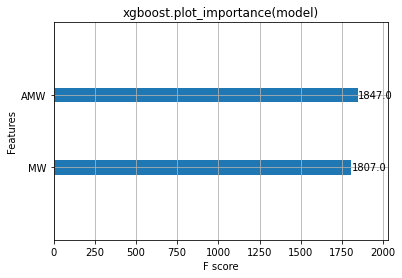

In [40]:
import shap
import xgboost
import matplotlib.pylab as pl
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
xgboost.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.show()

In [41]:
X_shap = X[['AMW', 'MW']]
X_train,X_test,y_train,y_test=train_test_split(X_shap,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
shap_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6428571428571429
Precision: 0.688
Recall: 0.4725274725274725


### 10. Boruta

In [42]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=6)
boru_selector = BorutaPy(rf, n_estimators='auto', verbose=0, random_state=1)
boru_selector.fit(X.values, y.values)

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=6,
                                          n_estimators=33, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7FAADBCA6940),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FAADBCA6940)

In [43]:
accept = X.columns[boru_selector.support_].to_list()
#accept

In [53]:
accept

['MW', 'AMW']

In [44]:
X_boruta = X[accept]
X_train,X_test,y_train,y_test=train_test_split(X_boruta,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
boruta_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6428571428571429
Precision: 0.688
Recall: 0.4725274725274725


### 11. Embedded Random Forest

In [45]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), max_features=6)
embeded_rf_selector.fit(X, y)
embeded_rf_feature = getFeature(embeded_rf_selector.get_support())
embeded_rf_feature

['MW', 'AMW', 'nI', 'C-042', 'CATS2D_01_DD']

In [46]:
X_rf = X[embeded_rf_feature]
X_train,X_test,y_train,y_test=train_test_split(X_rf,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
rf_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6428571428571429
Precision: 0.6850393700787402
Recall: 0.47802197802197804


### 12. Embedded LightGBM

In [47]:
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectFromModel
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05,
                    num_leaves=32, colsample_bytree=0.2,                                           
                    reg_alpha=3, reg_lambda=1, min_split_gain=0.01,    
                    min_child_weight=40)
embeded_lgb_selector = SelectFromModel(lgbc, max_features=6)
embeded_lgb_selector.fit(X, y)
embeded_lgb_feature = getFeature(embeded_lgb_selector.get_support())
embeded_lgb_feature

['MW', 'AMW']

In [48]:
X_lgbm = X[embeded_lgb_feature]
X_train,X_test,y_train,y_test=train_test_split(X_lgbm,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
lgbm_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6428571428571429
Precision: 0.688
Recall: 0.4725274725274725


In [54]:
chi_table = ['Chi-square', chi_acc, 'MW', 'AMW', 'nI', 'C-032', 'C-042', 'CATS2D_01_DD']
mi_table = ['Mutual Information', mi_acc, 'MW', 'AMW', 'B04[F-I]', 'B06[C-Si]', 'B10[P-Br]', 'F08[P-X]']
anova_table = ['Anova F-value', anova_acc, 'MW', 'AMW', 'nI', 'C-032', 'C-042', 'CATS2D_01_DD']
var_table = ['Variance Threshold',thresh_acc,'MW', 'AMW','-','-','-','-']
fisher_table = ['Fisher Score', fisher_acc, 'F03[C-P]', 'F10[I-I]', 'F07[P-Br]', 'F07[P-I]', 'F06[O-Si]','F05[C-X]']
multi_table = ['MultiSURF',multi_acc,'-','-','-','-','-','-']
rec_table = ['Recursive Feature Elimination',rec_acc, 'MW', 'AMW', 'nI', 'C-032', 'C-042', 'CATS2D_01_DD']
perm_table = ['Permutation Importance',perm_acc,'MW', 'nTB', 'nR03', 'O-061', 'F-081', 'B05[O-F]']
shap_table = ['SHAP', shap_acc, 'AMW', 'MW', '-','-','-','-']
boruta_table = ['Boruta',boruta_acc,'MW', 'AMW','-','-','-','-']
rf_table = ['Embedded Random Forest', rf_acc,'MW', 'AMW', 'nI', 'C-042', 'CATS2D_01_DD','-']
lgbm_table =['Embedded LightGBM', lgbm_acc, 'MW', 'AMW', '-','-','-','-']




In [55]:
myTable = [chi_table, mi_table, anova_table,var_table, fisher_table, multi_table, rec_table, perm_table, shap_table,
          boruta_table, rf_table, lgbm_table]




In [56]:
results = pd.DataFrame(myTable,columns=['Method', 'Accuracy','Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6'])

results                    

,Method,Accuracy,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6
0,Chi-square,0.642857,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
1,Mutual Information,0.642857,MW,AMW,B04[F-I],B06[C-Si],B10[P-Br],F08[P-X]
2,Anova F-value,0.642857,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
3,Variance Threshold,0.642857,MW,AMW,-,-,-,-
4,Fisher Score,0.518519,F03[C-P],F10[I-I],F07[P-Br],F07[P-I],F06[O-Si],F05[C-X]
5,MultiSURF,0.642857,-,-,-,-,-,-
6,Recursive Feature Elimination,0.642857,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
7,Permutation Importance,0.671958,MW,nTB,nR03,O-061,F-081,B05[O-F]
8,SHAP,0.642857,AMW,MW,-,-,-,-
9,Boruta,0.642857,MW,AMW,-,-,-,-


In [57]:
results.to_csv('result3_log.csv')

In [27]:
results.to_excel("result.xlsx", sheet_name='Sheet_name_1') 

In [15]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
diabetes = load_diabetes()
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25,random_state=0)

model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_val, y_val)

-7.3755193267135635

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

    # fit the model with data
logreg.fit(X_train,y_train)

    # get predict
y_pred=logreg.predict(X_val)
pp_im = metrics.accuracy_score(y_val, y_pred)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.72


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_val, y_val,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{data.columns[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")


MAC7(Z1)1165.723 +/- 206.355
MAC2(Z1)619.053 +/- 125.856
MAC7(Mw)445.093 +/- 78.788
MAC3(Z1)325.653 +/- 65.469
MAC1(Mw)325.040 +/- 68.574
MAC5(Mw)301.063 +/- 54.619
MAC2(Mw)288.199 +/- 53.579
MAC4(Z1)218.922 +/- 42.216
MAC6(Z1)200.863 +/- 33.593
MAC6(HP)147.973 +/- 29.946
MAC3(Ap)146.277 +/- 31.166
MAC3(HP)138.040 +/- 28.945
MAC2(HP)134.440 +/- 25.928
MAC4(HP)120.941 +/- 26.972
MAC2(Anp)68.624 +/- 15.016
MAC1(Z1)64.465 +/- 14.540
ID      42.625 +/- 9.762
MAC6(Ap)41.045 +/- 8.018
MAC2(Pb)35.842 +/- 8.133
MAC1(Ap)32.609 +/- 7.728
MAC5(Ap)32.016 +/- 7.120
MAC5(HP)29.192 +/- 7.033
MAC1(Pb)26.298 +/- 5.917
MAC3(Z2)25.562 +/- 7.107
MAC3(Pb)24.707 +/- 5.793
MAC3(Mw)23.074 +/- 5.522
MAC4(Anp)21.567 +/- 5.498
MAC4(Mw)20.694 +/- 4.832
MAC5(Pb)16.975 +/- 4.504
MAC6(Anp)15.981 +/- 4.661
MAC4(Z2)11.866 +/- 3.682
MAC5(Z1)11.369 +/- 3.312
MAC4(Ap)10.522 +/- 2.862
MAC1(Anp)7.779 +/- 2.848
MAC7(HP)6.746 +/- 2.626
MAC5(Z2)4.108 +/- 1.423
MAC3(IP)3.876 +/- 1.552
MAC2(Z2)2.550 +/- 0.830
MAC7(Z2)2.537 +/- 

In [18]:
X_perm1 = X[['MAC7(Z1)','MAC2(Z1)', 'MAC7(Mw)', 'MAC3(Z1)', 'MAC1(Mw)', 'MAC5(Mw)']]
X_train,X_test,y_train,y_test=train_test_split(X_perm1,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()

    # fit the model with data
logreg.fit(X_train,y_train)

    # get predict
y_pred=logreg.predict(X_test)
perm_acc = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.64
Precision: 0.5
Recall: 0.3333333333333333
